# TP Data Science — Partie A : Clustering (Segmentation de clients)

## 1. Introduction
L’objectif est de segmenter les clients du centre commercial en groupes homogènes, à partir du dataset Mall_Customers.csv. On utilisera le clustering (K-means) et la réduction de dimension (PCA).

In [13]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3. Nettoyage et prétraitement

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Mall_Customers.csv")
df.head()

print(df.isnull().sum())

features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


## 4. Analyse exploratoire (EDA)

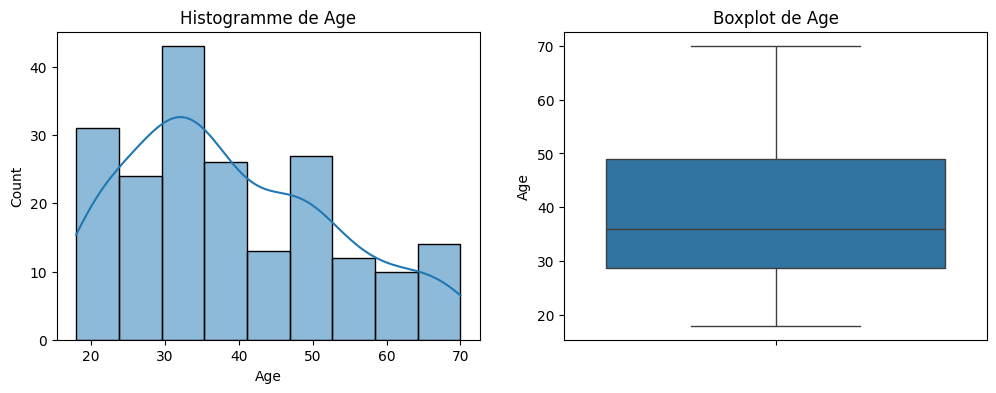

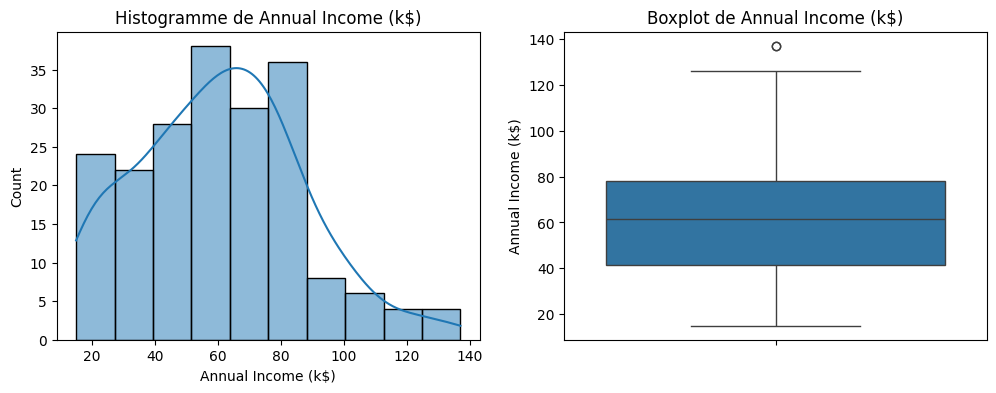

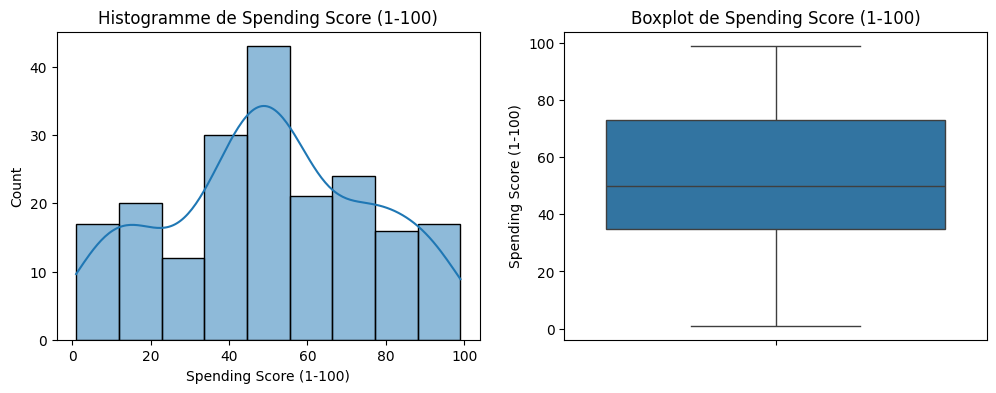

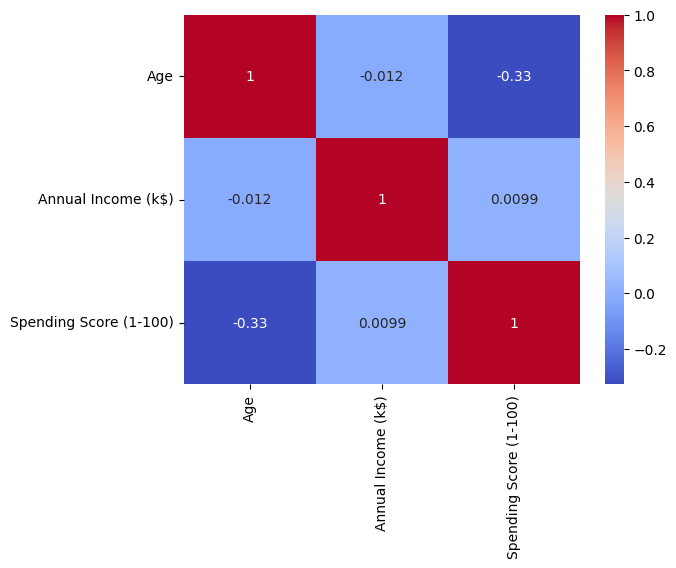

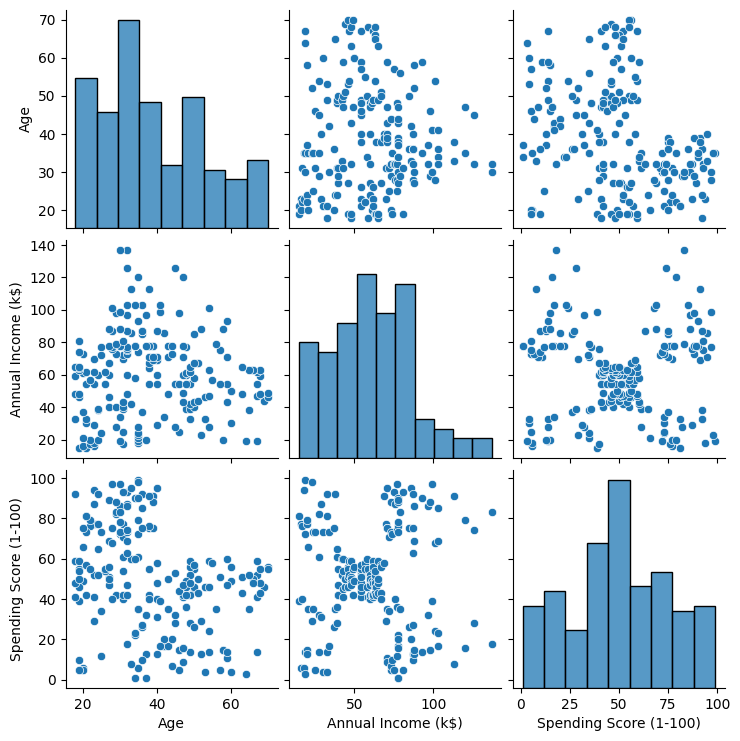

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f"Histogramme de {col}")
    sns.boxplot(y=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot de {col}")
    plt.show()
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm')
plt.show()
sns.pairplot(df[features])
plt.show()

## 5. Feature engineering

In [16]:
df_cluster = df_scaled.drop(["CustomerID"], axis=1)

## 6. Réduction de dimension (PCA)

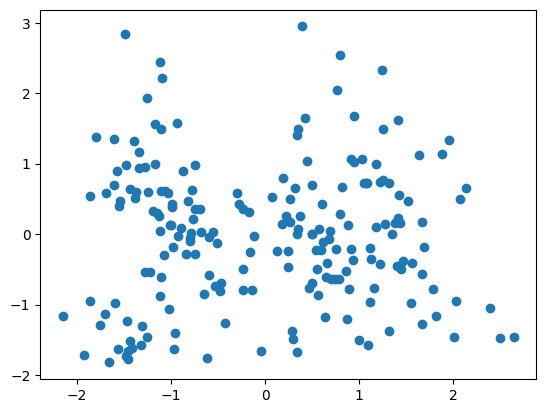

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_cluster[features])
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.show()

## 7. Clustering K-Means

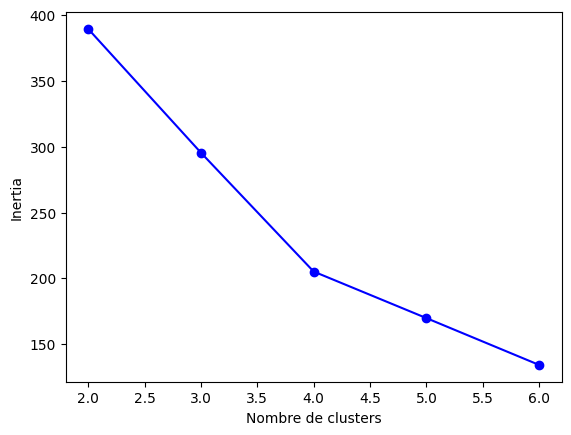

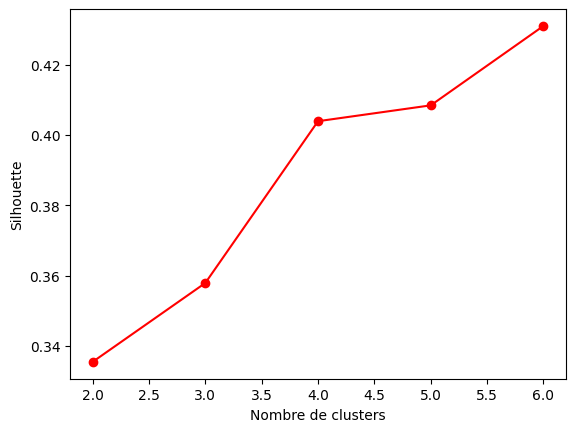

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia, silhouette = [], []
K = range(2, 7)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_cluster[features])
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_cluster[features], labels))

plt.plot(K, inertia, 'bo-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertia')
plt.show()

plt.plot(K, silhouette, 'ro-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Silhouette')
plt.show()

kmeans = KMeans(n_clusters=5, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster[features])

## 8. Interprétation des clusters

In [19]:
centroids = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids)
df_centroids = pd.DataFrame(centroids_original, columns=features)
df_centroids

,Age,Annual Income (k$),Spending Score (1-100)
0,55.275862,47.620690,41.706897
1,32.875000,86.100000,81.525000
2,25.769231,26.115385,74.846154
3,26.733333,54.311111,40.911111
4,44.387097,89.774194,18.483871


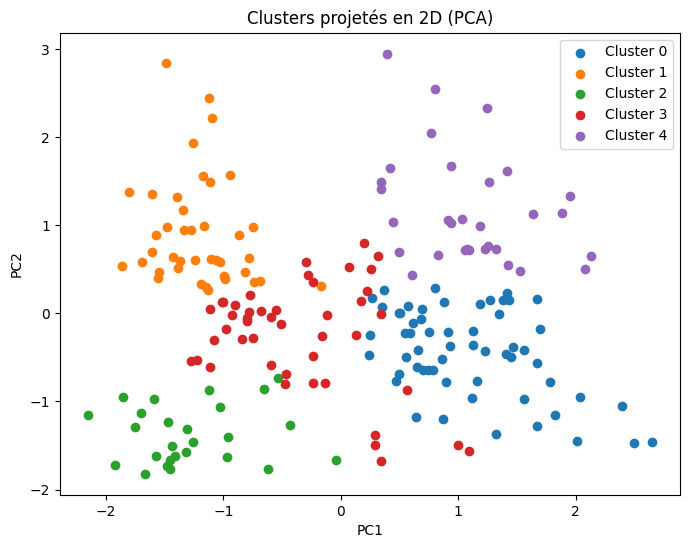

In [21]:
# Visualisation 2D (PCA)
plt.figure(figsize=(8,6))
for c in range(5):
    plt.scatter(X_pca[df_cluster['Cluster'] == c, 0], X_pca[df_cluster['Cluster'] == c, 1], label=f"Cluster {c}")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters projetés en 2D (PCA)')
plt.legend()
plt.show()

## 9. Conclusion
- Les clients ont été segmentés en 5 groupes homogènes selon l’âge, le revenu et le score de dépense.
- Cette segmentation peut guider des campagnes marketing ciblées.
- Il serait possible d’intégrer d’autres données (achats, fréquence de visite, etc) et d’essayer d’autres algorithmes.